### IPEDS data analysis

In this HW, we use the dataset provided at https://public.tableau.com/en-us/s/resources 
we want to find out what makes a student prefer a university, which are the most relevant features that students consider to choose an university. Firstly, we would want to explore the dataset to figure out what can we learn from the data. For instance, a hypothetic student might choose a university based on where the universities locates, cost of tuition and living expenses, type of degrees offered, and the admission rate each year.

Through this analysis, we want to know:

1) Does a high acceptance rate imply a university is preferred among students?

2) Do students favor for public universities or private university?

3) What is the change of preference when students are pursuing different types of degree?

Also, we want to create a neutral network model to predict number of applications based on universities features, eg: university tuition cost and living expenses

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import *
# from tensorflow.keras.optimizers import SGD, Adam
# from tensorflow.keras.activations import relu
import tensorflow_datasets as tfds
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### data preview

In [32]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import csv

with open('data.csv', encoding='cp1252') as file:
    ipeds=pd.read_csv(file)
    
ipeds.head()

,ID number,Name,year,ZIP code,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,...,Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB)
0,100654,Alabama A & M University,2013,35762,Doctor's degree - research/scholarship,Madison County,-86.568502,34.783368,Not applicable,Implied no,...,81.0,81.0,7.0,1.0,32.0,89.0,89.0,1.0,NaN,NaN
1,100663,University of Alabama at Birmingham,2013,35294-0110,Doctor's degree - research/scholarship and pro...,Jefferson County,-86.809170,33.502230,Not applicable,Implied no,...,36.0,36.0,10.0,0.0,60.0,56.0,55.0,5.0,24136.0,NaN
2,100690,Amridge University,2013,36117-3553,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.174010,32.362609,Churches of Christ,Implied no,...,90.0,90.0,0.0,40.0,90.0,100.0,100.0,0.0,NaN,302.0
3,100706,University of Alabama in Huntsville,2013,35899,Doctor's degree - research/scholarship and pro...,Madison County,-86.638420,34.722818,Not applicable,Yes,...,31.0,31.0,4.0,1.0,63.0,46.0,46.0,3.0,11502.0,NaN
4,100724,Alabama State University,2013,36104-0271,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.295677,32.364317,Not applicable,Implied no,...,76.0,76.0,13.0,11.0,34.0,81.0,81.0,0.0,13202.0,NaN


In [33]:
# data structure
print('The dataset contains {} rows and {} columns'.format(ipeds.shape[0],ipeds.shape[1]))

The dataset contains 1534 rows and 145 columns


In [34]:
ipeds.info(max_cols=len(ipeds))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 145 columns):
ID number                                                                                 1534 non-null int64
Name                                                                                      1534 non-null object
year                                                                                      1534 non-null int64
ZIP code                                                                                  1534 non-null object
Highest degree offered                                                                    1534 non-null object
County name                                                                               1534 non-null object
Longitude location of institution                                                         1534 non-null float64
Latitude location of institution                                                          1534 non-null float64
Reli

data are 'object', 'float64' and 'int64'

In [35]:
# working with missing data columns
ipeds.isna().sum().sort_values(ascending=False)

Endowment assets (year end) per FTE enrollment (GASB)       1018
SAT Writing 75th percentile score                            820
SAT Writing 25th percentile score                            820
Number of first-time undergraduates - residence unknown      623
Percent of first-time undergraduates - residence unknown     623
                                                            ... 
Historically Black College or University                       0
Tribal college                                                 0
Degree of urbanization (Urban-centric locale)                  0
Carnegie Classification 2010: Basic                            0
ID number                                                      0
Length: 145, dtype: int64

In [36]:
interested_cols =['Name', 'year', 'Applicants total',
        'Admissions total', 'Enrolled total', 'Estimated enrollment, total',
        'Tuition and fees, 2010-11',
        'Tuition and fees, 2011-12',
        'Tuition and fees, 2012-13',
        'Tuition and fees, 2013-14',
        'Total price for in-state students living on campus 2013-14',
        'Total price for out-of-state students living on campus 2013-14',
        'Full-time enrollment', 'Part-time enrollment',
        'Undergraduate enrollment', 'Graduate enrollment',
        'Full-time undergraduate enrollment',
        'Part-time undergraduate enrollment',
        'Percent of total enrollment that are women',
        'Percent of undergraduate enrollment that are women',
        'Percent of graduate enrollment that are women',
        'Graduation rate - Bachelor degree within 4 years, total',
        'Graduation rate - Bachelor degree within 5 years, total',
        'Graduation rate - Bachelor degree within 6 years, total',]

ipeds=ipeds[interested_cols]
ipeds.head()

,Name,year,Applicants total,Admissions total,Enrolled total,"Estimated enrollment, total","Tuition and fees, 2010-11","Tuition and fees, 2011-12","Tuition and fees, 2012-13","Tuition and fees, 2013-14",...,Undergraduate enrollment,Graduate enrollment,Full-time undergraduate enrollment,Part-time undergraduate enrollment,Percent of total enrollment that are women,Percent of undergraduate enrollment that are women,Percent of graduate enrollment that are women,"Graduation rate - Bachelor degree within 4 years, total","Graduation rate - Bachelor degree within 5 years, total","Graduation rate - Bachelor degree within 6 years, total"
0,Alabama A & M University,2013,6142.0,5521.0,1104.0,5024.0,5800.0,6828.0,7182.0,7182.0,...,4051.0,969.0,3799.0,252.0,55.0,51.0,69.0,10.0,23.0,29.0
1,University of Alabama at Birmingham,2013,5689.0,4934.0,1773.0,18568.0,5806.0,6264.0,6798.0,7206.0,...,11502.0,7066.0,8357.0,3145.0,61.0,58.0,64.0,29.0,46.0,53.0
2,Amridge University,2013,NaN,NaN,NaN,626.0,8360.0,8720.0,6800.0,6870.0,...,322.0,309.0,202.0,120.0,58.0,61.0,55.0,0.0,0.0,67.0
3,University of Alabama in Huntsville,2013,2054.0,1656.0,651.0,7376.0,7492.0,8094.0,8794.0,9192.0,...,5696.0,1680.0,4237.0,1459.0,44.0,44.0,43.0,16.0,37.0,48.0
4,Alabama State University,2013,10245.0,5251.0,1479.0,6076.0,7164.0,8082.0,7932.0,8720.0,...,5356.0,719.0,4872.0,484.0,61.0,59.0,71.0,9.0,19.0,25.0


In [37]:
# data structure
print('The dataset contains {} rows and {} columns'.format(ipeds.shape[0],ipeds.shape[1]))

The dataset contains 1534 rows and 24 columns


In [38]:
# Checking Null data 
ipeds.isnull().sum(axis = 0)
ipeds = ipeds.dropna(axis=0)
ipeds.isnull().sum(axis = 0)
ipeds.shape

Name                                                                0
year                                                                0
Applicants total                                                  157
Admissions total                                                  157
Enrolled total                                                    157
Estimated enrollment, total                                         2
Tuition and fees, 2010-11                                          44
Tuition and fees, 2011-12                                          44
Tuition and fees, 2012-13                                          42
Tuition and fees, 2013-14                                          37
Total price for in-state students living on campus 2013-14        134
Total price for out-of-state students living on campus 2013-14    134
Full-time enrollment                                                2
Part-time enrollment                                                2
Undergraduate enroll

Name                                                              0
year                                                              0
Applicants total                                                  0
Admissions total                                                  0
Enrolled total                                                    0
Estimated enrollment, total                                       0
Tuition and fees, 2010-11                                         0
Tuition and fees, 2011-12                                         0
Tuition and fees, 2012-13                                         0
Tuition and fees, 2013-14                                         0
Total price for in-state students living on campus 2013-14        0
Total price for out-of-state students living on campus 2013-14    0
Full-time enrollment                                              0
Part-time enrollment                                              0
Undergraduate enrollment                        

(1115, 24)

In [40]:
# data structure
print('The dataset contains {} rows and {} columns'.format(ipeds.shape[0],ipeds.shape[1]))
ipeds.head()

The dataset contains 1115 rows and 24 columns


,Name,year,Applicants total,Admissions total,Enrolled total,"Estimated enrollment, total","Tuition and fees, 2010-11","Tuition and fees, 2011-12","Tuition and fees, 2012-13","Tuition and fees, 2013-14",...,Undergraduate enrollment,Graduate enrollment,Full-time undergraduate enrollment,Part-time undergraduate enrollment,Percent of total enrollment that are women,Percent of undergraduate enrollment that are women,Percent of graduate enrollment that are women,"Graduation rate - Bachelor degree within 4 years, total","Graduation rate - Bachelor degree within 5 years, total","Graduation rate - Bachelor degree within 6 years, total"
0,Alabama A & M University,2013,6142.0,5521.0,1104.0,5024.0,5800.0,6828.0,7182.0,7182.0,...,4051.0,969.0,3799.0,252.0,55.0,51.0,69.0,10.0,23.0,29.0
1,University of Alabama at Birmingham,2013,5689.0,4934.0,1773.0,18568.0,5806.0,6264.0,6798.0,7206.0,...,11502.0,7066.0,8357.0,3145.0,61.0,58.0,64.0,29.0,46.0,53.0
3,University of Alabama in Huntsville,2013,2054.0,1656.0,651.0,7376.0,7492.0,8094.0,8794.0,9192.0,...,5696.0,1680.0,4237.0,1459.0,44.0,44.0,43.0,16.0,37.0,48.0
4,Alabama State University,2013,10245.0,5251.0,1479.0,6076.0,7164.0,8082.0,7932.0,8720.0,...,5356.0,719.0,4872.0,484.0,61.0,59.0,71.0,9.0,19.0,25.0
5,The University of Alabama,2013,30975.0,17515.0,6454.0,34752.0,7900.0,8600.0,9200.0,9450.0,...,29440.0,5312.0,26548.0,2892.0,55.0,54.0,58.0,43.0,62.0,67.0


<Figure size 864x576 with 0 Axes>

Text(0.5, 0, 'Applicants total')

Text(0, 0.5, 'Tuition and fees')

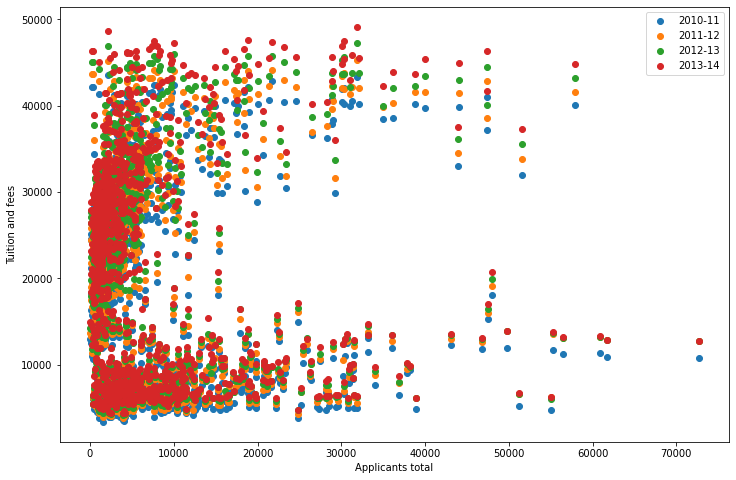

In [53]:
#Plot correlations 
plt.figure(figsize=(12,8))
plt.scatter(ipeds['Applicants total'],ipeds['Tuition and fees, 2010-11'], label = '2010-11')
plt.scatter(ipeds['Applicants total'],ipeds['Tuition and fees, 2011-12'], label = '2011-12')
plt.scatter(ipeds['Applicants total'],ipeds['Tuition and fees, 2012-13'], label = '2012-13')
plt.scatter(ipeds['Applicants total'],ipeds['Tuition and fees, 2013-14'], label = '2013-14')
plt.xlabel('Applicants total')
plt.ylabel('Tuition and fees')
plt.legend()
plt.show()

<Figure size 864x576 with 0 Axes>

Text(0.5, 0, 'Applicants total')

Text(0, 0.5, 'Cost of living 2013-2014')

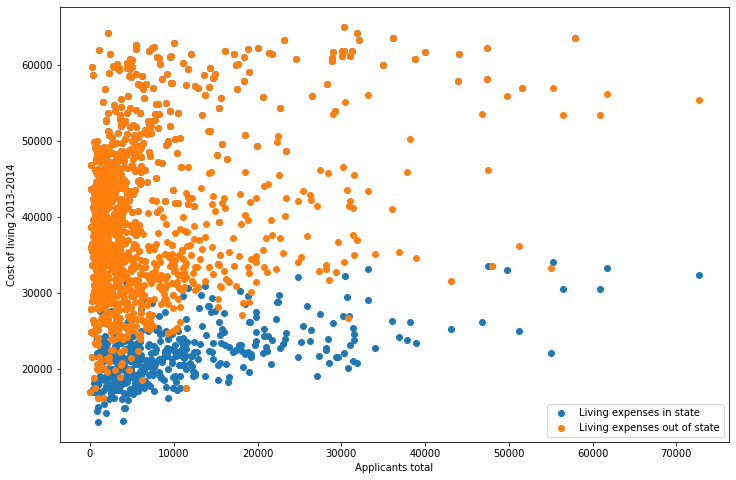

In [56]:
#Plot correlations 
plt.figure(figsize=(12,8))
plt.scatter(ipeds['Applicants total'],ipeds['Total price for in-state students living on campus 2013-14'], label = 'Living expenses in state')
plt.scatter(ipeds['Applicants total'],ipeds['Total price for out-of-state students living on campus 2013-14'], label = 'Living expenses out of state')

plt.xlabel('Applicants total')
plt.ylabel('Cost of living 2013-2014')
plt.legend()
plt.show()

In [57]:
f_cols =['Tuition and fees, 2010-11','Tuition and fees, 2011-12', 'Tuition and fees, 2012-13', 'Tuition and fees, 2013-14',
        'Total price for in-state students living on campus 2013-14',
        'Total price for out-of-state students living on campus 2013-14',]
target_cols = ['Applicants total']

In [61]:
x_train, x_test, y_train, y_test = train_test_split(ipeds[f_cols], ipeds[target_cols],test_size=0.3)
x_train.head()
print(x_train.shape)
y_train.head()
print(y_train.shape)

,"Tuition and fees, 2010-11","Tuition and fees, 2011-12","Tuition and fees, 2012-13","Tuition and fees, 2013-14",Total price for in-state students living on campus 2013-14,Total price for out-of-state students living on campus 2013-14
1080,33000.0,34505.0,36090.0,37505.0,57870.0,57870.0
23,26730.0,28060.0,29450.0,30924.0,46170.0,46170.0
425,20656.0,21680.0,22756.0,23886.0,37632.0,37632.0
1040,28735.0,31551.0,33095.0,34835.0,51035.0,51035.0
363,24920.0,25950.0,26746.0,27920.0,39742.0,39742.0


(780, 6)


,Applicants total
1080,43945.0
23,6596.0
425,436.0
1040,7304.0
363,2195.0


(780, 1)


In [62]:
#using Keras's Sequential model - https://keras.io/api/models/sequential/
model = Sequential()
#add input layer
model.add(Input(shape=(len(f_cols),))) #the input layer shape should match the number of features we have
#add first layer of fully connected neurons
model.add(Dense(64,activation='relu'))
#add second layer (first hidden layer)
model.add(Dense(64,activation='relu'))
#and one more because why not
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))

#finally, our output layer should have only one neuron because we are trying to predict only one number
#notice how there is a different activation function in this layer
#this is because we want our outputs for each class to be a probability
model.add(Dense(y_train.shape[0],activation='softmax'))

#compile our model - set our loss metric (categorical cross entropy) and optimizer (stochastic gradient descent)
#how does the model performance change with different optimizers (ie AdaGrad, SGD, etc.)?
model.compile(loss='CategoricalCrossentropy',optimizer='Adam',metrics=['accuracy'])

#let's see a summary of our model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                448       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 780)               50700     
Total params: 63,628
Trainable params: 63,628
Non-trainable params: 0
_________________________________________________________________


In [64]:
history = model.fit(
    x_train, y_train,
    validation_split=0.3,
    verbose=1, epochs=100, batch_size=100, shuffle=True)

Epoch 1/100


ValueError: in user code:

    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:788 run_step  **
        outputs = model.train_step(data)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:755 train_step
        loss = self.compiled_loss(
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/compile_utils.py:203 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:152 __call__
        losses = call_fn(y_true, y_pred)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:256 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:1537 categorical_crossentropy
        return K.categorical_crossentropy(y_true, y_pred, from_logits=from_logits)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/backend.py:4833 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/framework/tensor_shape.py:1134 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 1) and (None, 780) are incompatible
